# Import librerie

In [1]:
!pip install nltk
!pip install scipy
import pandas as pd
import numpy as np
import nltk
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import wordnet
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_selection import SelectKBest
import scipy

# Pre-Processing

In [2]:
# Import dei dati con pandas

#CLickbait
clickbait = pd.read_fwf("clickbait_data.txt",header=None,delimiter="\t")
typology=['clickbait'] * len(clickbait[0])
clickbait['typology'] = typology
clickbait.columns=["Title","Typology"]

#No_Clickbait
no_clickbait = pd.read_fwf("non_clickbait_data.txt", header=None,delimiter="\t")
typology=['no_clickbait'] * len(no_clickbait[0])
no_clickbait['typology'] = typology
no_clickbait.columns=["Title", "Typology"]

titles = clickbait.append(no_clickbait)
titles=titles.reset_index().drop('index',axis=1)
#appendo i clickbait ai non clickbait, così da poter effettuare operazioni di preprocessing uniche
titles

,Title,Typology
0,Should I Get Bings,clickbait
1,Which TV Female Friend Group Do You Belong In,clickbait
2,"The New ""Star Wars: The Force Awakens"" Trailer...",clickbait
3,"This Vine Of New York On ""Celebrity Big Brothe...",clickbait
4,A Couple Did A Stunning Photo Shoot With Their...,clickbait
...,...,...
31995,"To Make Female Hearts Flutter in Iraq, Throw a...",no_clickbait
31996,"British Liberal Democrat Patsy Calton, 56, die...",no_clickbait
31997,Drone smartphone app to help heart attack vict...,no_clickbait
31998,"Netanyahu Urges Pope Benedict, in Israel, to D...",no_clickbait


In [5]:
# tokenization , normalization, lemmatization, stopword

In [5]:
# Definizione del dizionario per il POS Tagging
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')


def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)

# Lemmatization
lemmatizer = WordNetLemmatizer()


lemmatized = []

for index,row in titles.iterrows():
  sentence = row['Title'].lower()
  lemmatized_sentence = [lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in nltk.word_tokenize(sentence)]
  
  lemmatized.append(lemmatized_sentence)
    
titles['lemmatized'] = lemmatized
titles

[nltk_data] Downloading package wordnet to /home/napo/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /home/napo/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/napo/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


,Title,Typology,tokenized_clean,lemmatized
0,Should I Get Bings,clickbait,"[should, i, get, bings]","[should, i, get, bings]"
1,Which TV Female Friend Group Do You Belong In,clickbait,"[which, tv, female, friend, group, do, you, be...","[which, tv, female, friend, group, do, you, be..."
2,"The New ""Star Wars: The Force Awakens"" Trailer...",clickbait,"[the, new, ``, star, war, the, force, awakens,...","[the, new, ``, star, war, :, the, force, awake..."
3,"This Vine Of New York On ""Celebrity Big Brothe...",clickbait,"[this, vine, of, new, york, on, ``, celebrity,...","[this, vine, of, new, york, on, ``, celebrity,..."
4,A Couple Did A Stunning Photo Shoot With Their...,clickbait,"[a, couple, do, a, stun, photo, shoot, with, t...","[a, couple, do, a, stun, photo, shoot, with, t..."
...,...,...,...,...
31995,"To Make Female Hearts Flutter in Iraq, Throw a...",no_clickbait,"[to, make, female, heart, flutter, in, iraq, t...","[to, make, female, heart, flutter, in, iraq, ,..."
31996,"British Liberal Democrat Patsy Calton, 56, die...",no_clickbait,"[british, liberal, democrat, patsy, calton, 56...","[british, liberal, democrat, patsy, calton, ,,..."
31997,Drone smartphone app to help heart attack vict...,no_clickbait,"[drone, smartphone, app, to, help, heart, atta...","[drone, smartphone, app, to, help, heart, atta..."
31998,"Netanyahu Urges Pope Benedict, in Israel, to D...",no_clickbait,"[netanyahu, urge, pope, benedict, in, israel, ...","[netanyahu, urge, pope, benedict, ,, in, israe..."


In [6]:
# Rimozione punteggiatura e Tokenization

punct = [ ':','|','\'',',']
tokenized_clean = []
for index,row in titles.iterrows():
  tokens =[]
  flag = False
  for token in row['lemmatized']:
    if token not in punct:
        if flag:
          last_word = tokens[-1]
          tokens.remove(last_word)
          tokens.append(last_word+token)
          flag = False
        if token == "-":
          last_word = tokens[-1]
          tokens.remove(last_word)
          tokens.append(last_word+"-")
          flag = True
        else:
          tokens.append(token)

  tokenized_clean.append(tokens)   


titles['tokenized_clean'] = tokenized_clean
titles = titles.drop(['lemmatized'],axis=1)              
titles

,Title,Typology,tokenized_clean
0,Should I Get Bings,clickbait,"[should, i, get, bings]"
1,Which TV Female Friend Group Do You Belong In,clickbait,"[which, tv, female, friend, group, do, you, be..."
2,"The New ""Star Wars: The Force Awakens"" Trailer...",clickbait,"[the, new, ``, star, war, the, force, awakens,..."
3,"This Vine Of New York On ""Celebrity Big Brothe...",clickbait,"[this, vine, of, new, york, on, ``, celebrity,..."
4,A Couple Did A Stunning Photo Shoot With Their...,clickbait,"[a, couple, do, a, stun, photo, shoot, with, t..."
...,...,...,...
31995,"To Make Female Hearts Flutter in Iraq, Throw a...",no_clickbait,"[to, make, female, heart, flutter, in, iraq, t..."
31996,"British Liberal Democrat Patsy Calton, 56, die...",no_clickbait,"[british, liberal, democrat, patsy, calton, 56..."
31997,Drone smartphone app to help heart attack vict...,no_clickbait,"[drone, smartphone, app, to, help, heart, atta..."
31998,"Netanyahu Urges Pope Benedict, in Israel, to D...",no_clickbait,"[netanyahu, urge, pope, benedict, in, israel, ..."


In [7]:
# Rimozione Stopwords
nltk.download('stopwords')
stop_words = nltk.corpus.stopwords.words('english')  
  
#ricostruzione le stringhe dai token
clean_text =[]
for index,row in titles.iterrows():
    phrase_string =""    
    for word in row['tokenized_clean']:
      word = word.lower()

      if word not in stop_words:
        phrase_string = phrase_string+word+" "
    phrase_string = phrase_string.lower()
    clean_text.append(phrase_string)    
titles['clean_text'] = clean_text

titles.head(1000)

[nltk_data] Downloading package stopwords to /home/napo/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Title,Typology,tokenized_clean,clean_text
0,Should I Get Bings,clickbait,"[should, i, get, bings]",get bings
1,Which TV Female Friend Group Do You Belong In,clickbait,"[which, tv, female, friend, group, do, you, be...",tv female friend group belong
2,"The New ""Star Wars: The Force Awakens"" Trailer...",clickbait,"[the, new, ``, star, war, the, force, awakens,...",new `` star war force awakens '' trailer give ...
3,"This Vine Of New York On ""Celebrity Big Brothe...",clickbait,"[this, vine, of, new, york, on, ``, celebrity,...",vine new york `` celebrity big brother '' fuck...
4,A Couple Did A Stunning Photo Shoot With Their...,clickbait,"[a, couple, do, a, stun, photo, shoot, with, t...",couple stun photo shoot baby learn inoperable ...
...,...,...,...,...
995,Can You Tell The Difference Between High Stree...,clickbait,"[can, you, tell, the, difference, between, hig...",tell difference high street designer
996,Which Gotham Girl Are You,clickbait,"[which, gotham, girl, be, you]",gotham girl
997,This 2-Year-Old Trying To Blow Out His Birthda...,clickbait,"[this, 2-year-old, try, to, blow, out, his, bi...",2-year-old try blow birthday candle heartbreak...
998,Which 5SOS Guy Are You,clickbait,"[which, 5sos, guy, be, you]",5sos guy


# Clustering



## RAPPRESENTAZIONE VETTORIALE

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD 
from scipy.sparse import random as sparse_random 

# Rappresentare in forma Vettoriale un documento/corpus
#si sceglie tf-idf per text clustering

vectorizer = TfidfVectorizer()
X_tfid = vectorizer.fit_transform(clean_text)
x_tfid = X_tfid.toarray()
labels = titles['Typology'].values.tolist()


# To Matrix
matrix_tfid = scipy.sparse.csr_matrix(x_tfid)


# n_components: Desired dimensionality of output data. # n_iter: Number of iterations for randomized SVD solver 
svd_tfid = TruncatedSVD(n_components = 3100, n_iter=5, random_state=99)
matrix_svd_tfid = svd_tfid.fit_transform(matrix_tfid)


In [13]:
print((svd_tfid.explained_variance_ratio_).sum())

0.7505736870819014


## K-MEANS

In [14]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans 
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics.cluster import v_measure_score
from sklearn.metrics.cluster import normalized_mutual_info_score 
from sklearn.metrics.cluster import fowlkes_mallows_score
from sklearn.metrics import silhouette_score




### ITERAZIONE PER CAPIRE QUALE POSSA ESSERE IL K MIGLIORE
for i in (9, 16, 20, 32):
  kmeans = KMeans(n_clusters = i, random_state= 99).fit(matrix_svd_tfid)        ##
  kmeans_y = kmeans.fit_predict(matrix_svd_tfid)
  lab = kmeans.labels_

  print("Number of Clusters", i)
  cal_har_score = calinski_harabasz_score(matrix_svd_tfid, lab)
  print("Calinski_H_score for", i, "is:", cal_har_score)  

Number of Clusters 9
Calinski_H_score for 9 is: 78.19710955526571
Number of Clusters 16
Calinski_H_score for 16 is: 49.58349709834555
Number of Clusters 20
Calinski_H_score for 20 is: 57.5050010344998
Number of Clusters 32
Calinski_H_score for 32 is: 45.87987948970764


In [15]:
# DEFINIZIONE K-Means
from sklearn.cluster import KMeans 
kmeans = KMeans(n_clusters = 9, random_state = 99).fit(matrix_svd_tfid)        ##
kmeans_y = kmeans.fit_predict(matrix_svd_tfid)
lab = kmeans.labels_

In [16]:
from sklearn.metrics import silhouette_score

# Misura di validazione Interna
print(silhouette_score(matrix_svd_tfid, lab, metric='cosine'))

0.00990934540069645


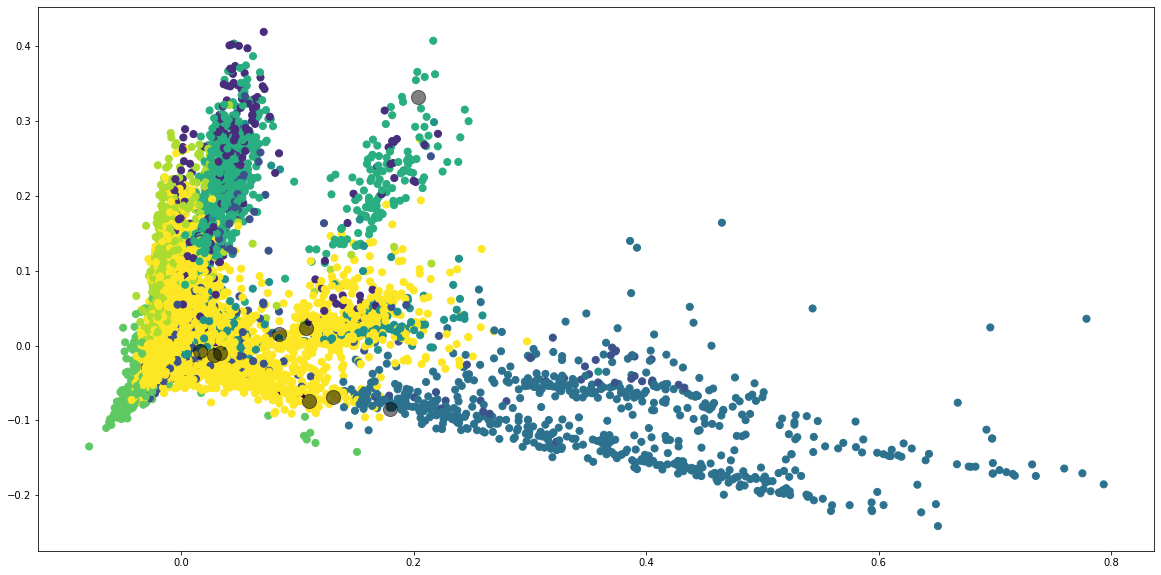

In [17]:
# PLOTTING K-MEANS

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

## Riduzione della matrice in spazio bi-dimensionale
pca = PCA(n_components=2)
scatter_plot_points = pca.fit_transform(matrix_svd_tfid)

x_axis = [o[0] for o in scatter_plot_points]
y_axis = [o[1] for o in scatter_plot_points]
fig, ax = plt.subplots(figsize=(20,10))

ax.scatter(x_axis, y_axis, c=kmeans_y, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
ax.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

## ESPLORAZIONE CLUSTERS

In [18]:
# Investigazione delle corrispondenze tra titoli e clusters
import pandas as pd

clusters = pd.DataFrame(list(zip(clean_text,lab)), columns=['document', 'clusters'])
clusters = pd.merge(clusters, titles['Typology'], right_index = True, left_index = True)
clusters

,document,clusters,Typology
0,get bings,8,clickbait
1,tv female friend group belong,8,clickbait
2,new `` star war force awakens '' trailer give ...,8,clickbait
3,vine new york `` celebrity big brother '' fuck...,8,clickbait
4,couple stun photo shoot baby learn inoperable ...,8,clickbait
...,...,...,...
31995,make female heart flutter iraq throw shoe,7,no_clickbait
31996,british liberal democrat patsy calton 56 dy ca...,8,no_clickbait
31997,drone smartphone app help heart attack victim ...,8,no_clickbait
31998,netanyahu urge pope benedict israel denounce i...,8,no_clickbait


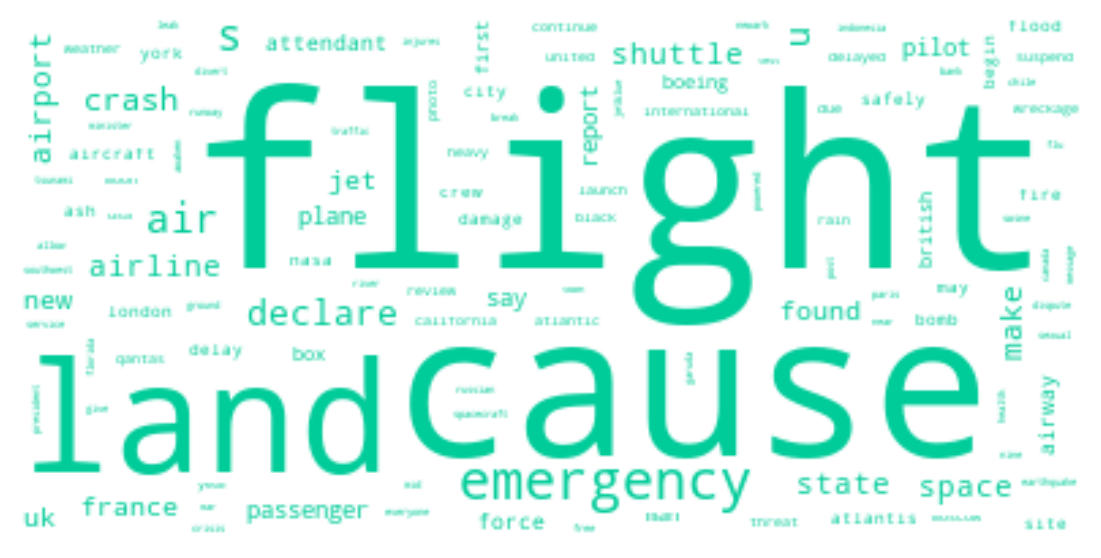

In [38]:
## PLOTTING DEI 9 WORDCLOUD

import numpy as np
from PIL import Image
from os import path
import matplotlib.pyplot as plt
import os
import random

from wordcloud import WordCloud, STOPWORDS
fig, ax = plt.subplots(figsize=(20,10))


def azzurro6_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(165, 100%, 40%)"


with pd.option_context('display.max_rows', None, 'display.max_columns', None):
  
  # C_0 CLUSTER "PERFECT"
  c_0 = clusters[clusters['clusters']==0]
  c_0.to_csv('c_0.csv')
  
  c0_wc = pd.DataFrame(c_0['document'])
  c0_wc.to_csv('c0_wc.csv')

  # Text import
  text = open('c0_wc.csv').read()


  wc = WordCloud(max_words=1000, margin=10,
                random_state=1, background_color ="white", collocations=False).generate(text)


  # store default colored image
  default_colors = wc.to_array()


  plt.axis("off")
  #plt.title("Cluster 0")
  plt.imshow(wc.recolor(color_func=azzurro6_color_func, random_state=600),
           interpolation="bilinear")
  wc.to_file("wc_0.png")
  plt.show()
    
# print(c_0)


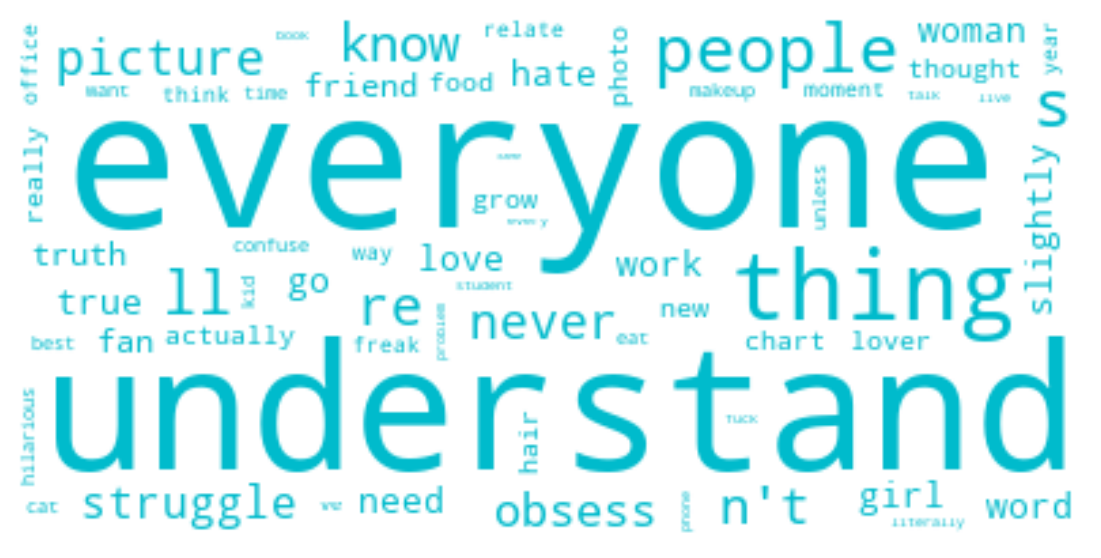

In [39]:
def azzurro2_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(185, 100%, 40%)"


with pd.option_context('display.max_rows', None, 'display.max_columns', None):
  fig, ax = plt.subplots(figsize=(20,10))

  # C_1 CLUSTER "ECONOMICS"
  c_1 = clusters[clusters['clusters']==1]
  c_1.to_csv('c_1.csv')

  c1_wc = pd.DataFrame(c_1['document'])
  c1_wc.to_csv('c1_wc.csv')

  # Text import
  text = open('c1_wc.csv').read()


  wc = WordCloud(max_words=1000, margin=10,
                random_state=1, background_color ="white", collocations=False).generate(text)
                
  # store default colored image
  default_colors = wc.to_array()

  plt.axis("off")
  plt.imshow(wc.recolor(color_func=azzurro2_color_func), interpolation="bilinear")
  wc.to_file("wc_1.png")

  plt.show()

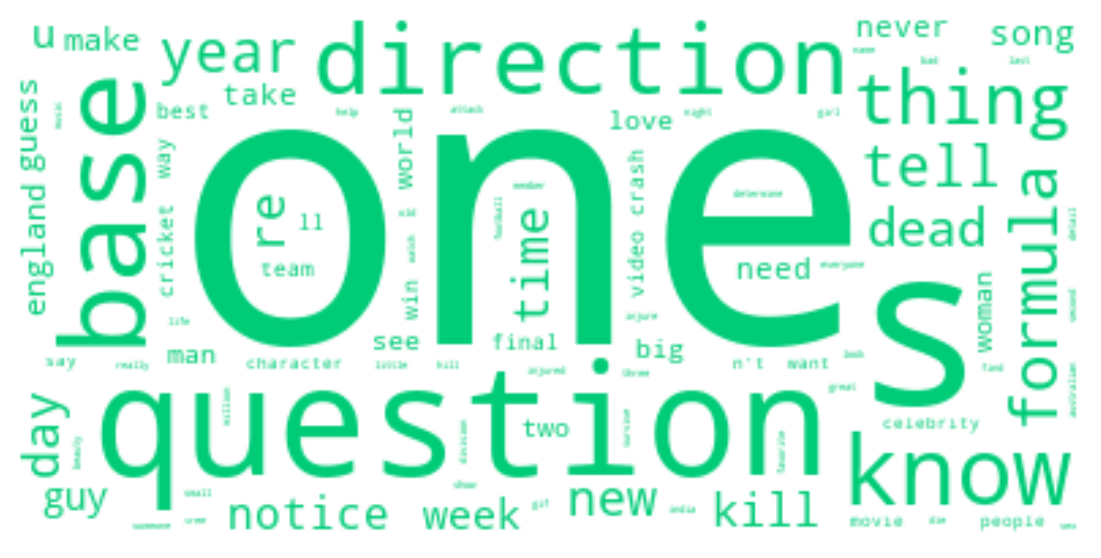

In [40]:
def azzurro9_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(155, 100%, 40%)"


with pd.option_context('display.max_rows', None, 'display.max_columns', None):
  fig, ax = plt.subplots(figsize=(20,10))


  # C_2 CLUSTER "MAKE POLICY"
  c_2 = clusters[clusters['clusters']==2]
  c_2.to_csv('c_2.csv')

  c2_wc = pd.DataFrame(c_2['document'])
  c2_wc.to_csv('c2_wc.csv')


  # Text import
  text = open('c2_wc.csv').read()


  wc = WordCloud(max_words=1000, margin=10,
                random_state=1, background_color ="white", collocations=False).generate(text)
                
  # store default colored image
  default_colors = wc.to_array()

  
  plt.axis("off")
  plt.imshow(wc.recolor(color_func=azzurro9_color_func), interpolation="bilinear")
  wc.to_file("wc_2.png")
  plt.show()

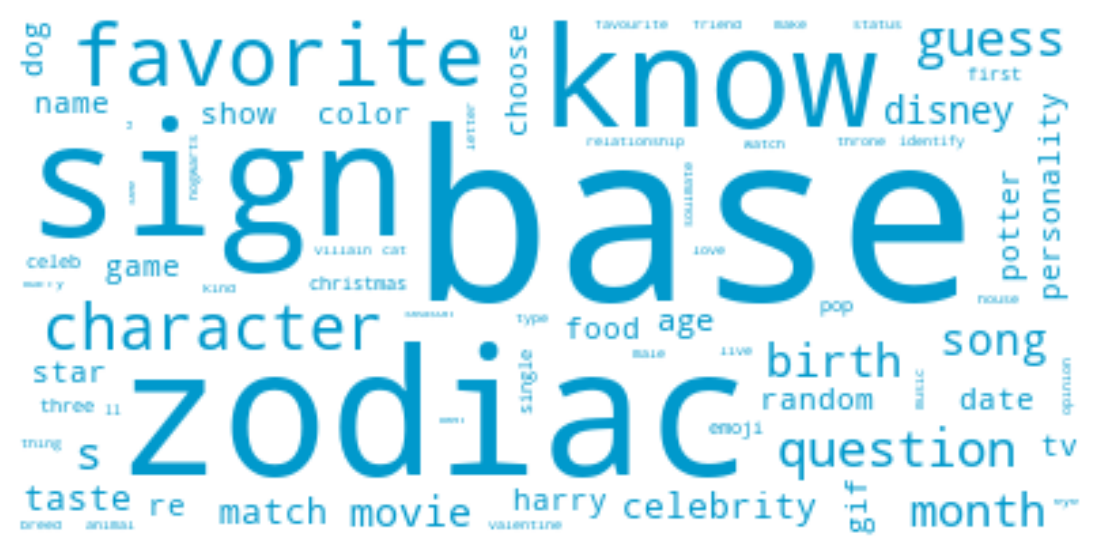

In [41]:
def azzurro7_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(195, 100%, 40%)"



with pd.option_context('display.max_rows', None, 'display.max_columns', None):
  fig, ax = plt.subplots(figsize=(20,10))

  # C_3 CLUSTER "MUSICA"
  c_3 = clusters[clusters['clusters']==3]
  c_3.to_csv('c_3.csv')

  c3_wc = pd.DataFrame(c_3['document'])
  c3_wc.to_csv('c3_wc.csv')

  # Text import
  text = open('c3_wc.csv').read()


  wc = WordCloud(max_words=1000, margin=10,
                random_state=1, background_color ="white", collocations=False).generate(text)
                
  # store default colored image
  default_colors = wc.to_array()

  
  plt.axis("off")
  plt.imshow(wc.recolor(color_func=azzurro7_color_func), interpolation="bilinear")
  wc.to_file("wc_3.png")
  plt.show()

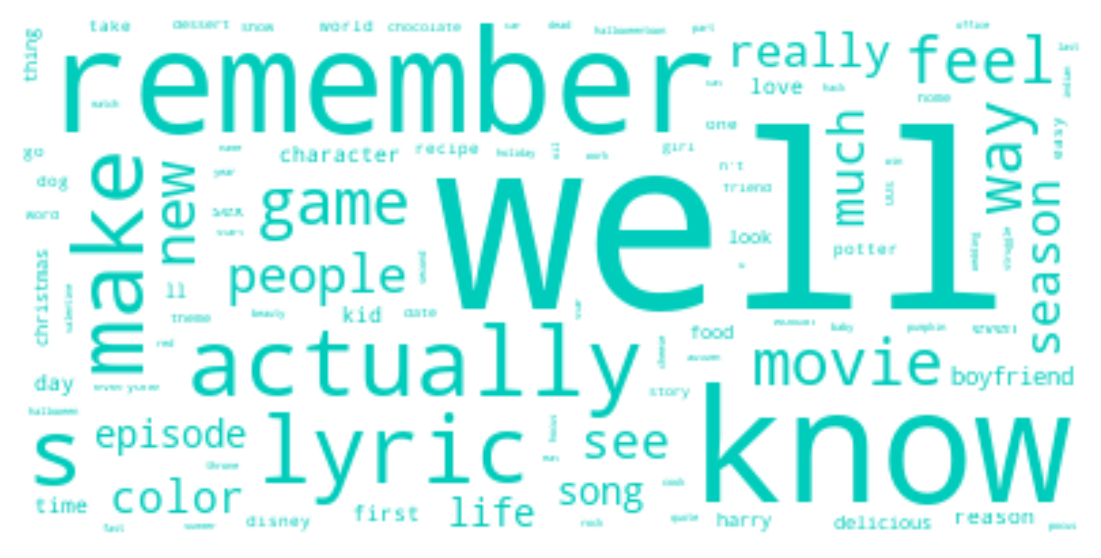

In [42]:
def azzurro5_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(175, 100%, 40%)"



with pd.option_context('display.max_rows', None, 'display.max_columns', None):
  fig, ax = plt.subplots(figsize=(20,10))

  # C_4 CLUSTER "YEAR"
  c_4 = clusters[clusters['clusters']==4]
  c_4.to_csv('c_4.csv')

  c4_wc = pd.DataFrame(c_4['document'])
  c4_wc.to_csv('c4_wc.csv')

  # Text import
  text = open('c4_wc.csv').read()


  wc = WordCloud(max_words=1000, margin=10,
                random_state=1, background_color ="white", collocations=False).generate(text)
                
  # store default colored image
  default_colors = wc.to_array()

  
  plt.axis("off")
  plt.imshow(wc.recolor(color_func=azzurro5_color_func), interpolation="bilinear")
  wc.to_file("wc_4.png")
  plt.show()

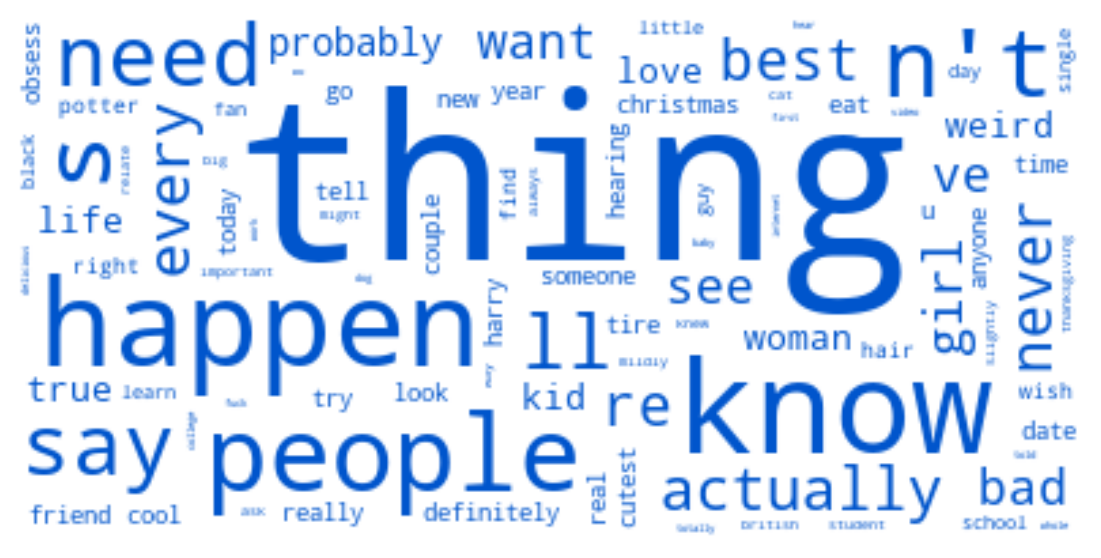

In [43]:
def azzurro8_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(215, 100%, 40%)"



with pd.option_context('display.max_rows', None, 'display.max_columns', None):
  fig, ax = plt.subplots(figsize=(20,10))

  # C_5 CLUSTER "LAUGH"
  c_5 = clusters[clusters['clusters']==5]
  c_5.to_csv('c_5.csv')

  c5_wc = pd.DataFrame(c_5['document'])
  c5_wc.to_csv('c5_wc.csv')

  # Text import
  text = open('c5_wc.csv').read()


  wc = WordCloud(max_words=1000, margin=10,
                random_state=1, background_color ="white", collocations=False).generate(text)
                
  # store default colored image
  default_colors = wc.to_array()

  plt.axis("off")
  plt.imshow(wc.recolor(color_func=azzurro8_color_func), interpolation="bilinear")
  wc.to_file("wc_5.png")
  
  plt.show()

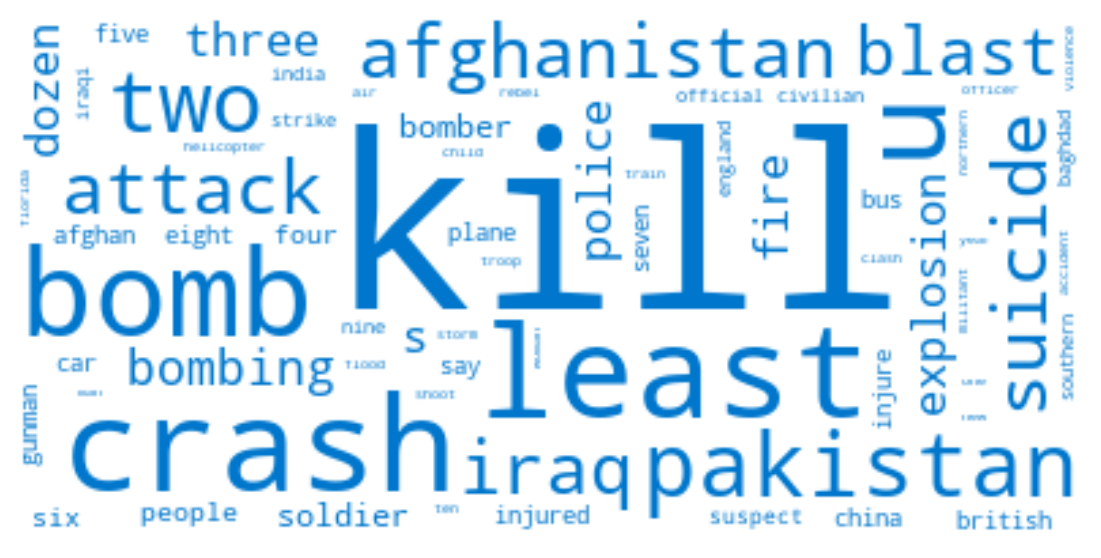

In [44]:
def azzurro_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(205, 100%, 40%)"


with pd.option_context('display.max_rows', None, 'display.max_columns', None):
  fig, ax = plt.subplots(figsize=(20,10))

  # C_6 CLUSTER "POLITICS"
  c_6 = clusters[clusters['clusters']==6]
  c_6.to_csv('c_6.csv')

  c6_wc = pd.DataFrame(c_6['document'])
  c6_wc.to_csv('c6_wc.csv')

  # Text import
  text = open('c6_wc.csv').read()


  wc = WordCloud(max_words=1000, margin=10,
                random_state=1, background_color ="white", collocations=False).generate(text)
                
  # store default colored image
  default_colors = wc.to_array()

  
  plt.axis("off")
  plt.imshow(wc.recolor(color_func = azzurro_color_func), interpolation="bilinear")
  wc.to_file("wc_6.png")
  plt.show()

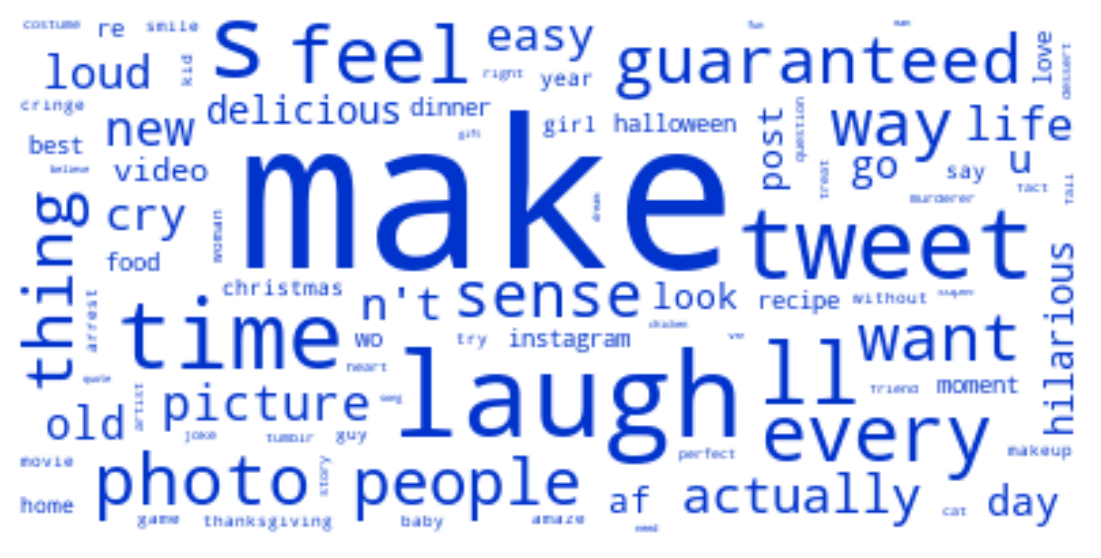

In [45]:
def azzurro3_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(225, 100%, 40%)"



with pd.option_context('display.max_rows', None, 'display.max_columns', None):
  fig, ax = plt.subplots(figsize=(20,10))

  # C_7 CLUSTER "THING/CLASSIFICHE""
  c_7 = clusters[clusters['clusters']==7]
  c_7.to_csv('c_7.csv')

  c7_wc = pd.DataFrame(c_7['document'])
  c7_wc.to_csv('c7_wc.csv')

  # Text import
  text = open('c7_wc.csv').read()


  wc = WordCloud(max_words=1000, margin=10,
                random_state=1,background_color ="white", collocations=False).generate(text)
                
  # store default colored image
  default_colors = wc.to_array()

  
  plt.axis("off")
  plt.imshow(wc.recolor(color_func=azzurro3_color_func), interpolation="bilinear")
  wc.to_file("wc_7.png")
  plt.show()

In [ ]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
  print(c_7)

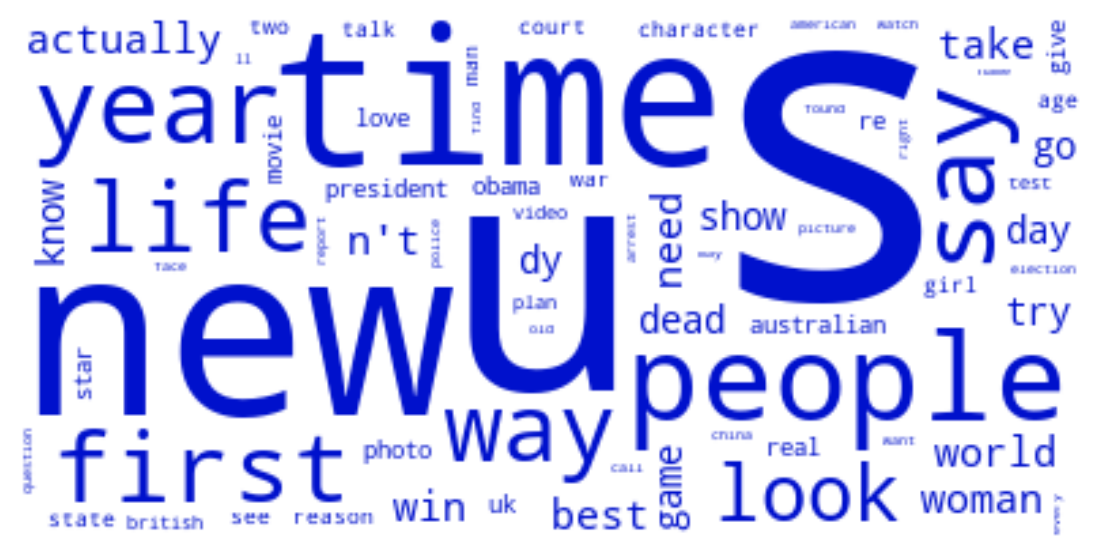

In [46]:


def azzurro4_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(235, 100%, 40%)"


with pd.option_context('display.max_rows', None, 'display.max_columns', None):
  fig, ax = plt.subplots(figsize=(20,10))

  # C_8 CLUSTER "ZODIACO"
  c_8 = clusters[clusters['clusters']==8]
  c_8.to_csv('c_8.csv')

  c8_wc = pd.DataFrame(c_8['document'])
  c8_wc.to_csv('c8_wc.csv')

    # Text import
  text = open('c8_wc.csv').read()

  wc = WordCloud(max_words=1000, margin=10,
                random_state=1 , background_color ="white", collocations=False).generate(text)
                
  # store default colored image
  default_colors = wc.to_array()

  
  plt.axis("off")
  plt.imshow(wc.recolor(color_func=azzurro4_color_func), interpolation="bilinear")
  wc.to_file("wc_8.png")
  plt.show()

In [29]:
# Fare dataframe lunghezze clusters

a = display(len(c_0), len(c_1), len(c_2), len(c_3), len(c_4), len(c_5), len(c_6), len(c_7), len(c_8))#, len(c_9), len(c_10), len(c_11), len(c_12), len(c_13), len(c_14), len(c_15))
a = pd.DataFrame(a)

283

499

474

619

377

933

800

1142

26873

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


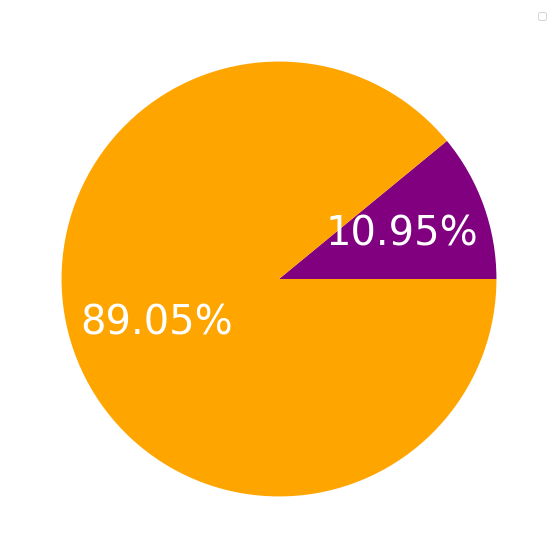

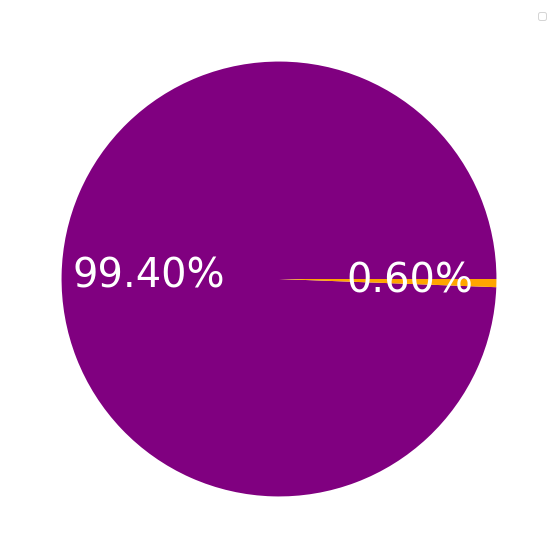

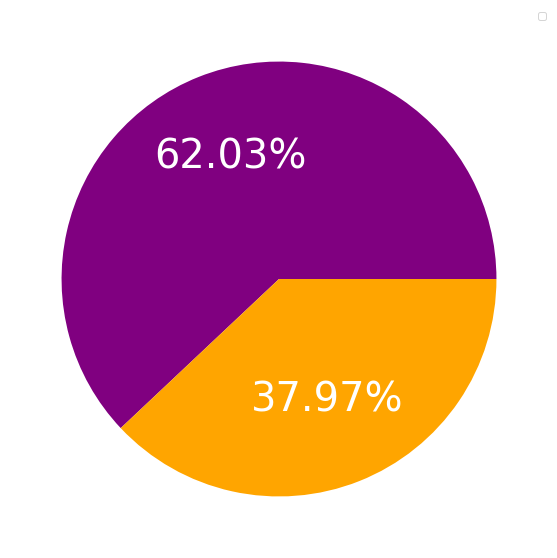

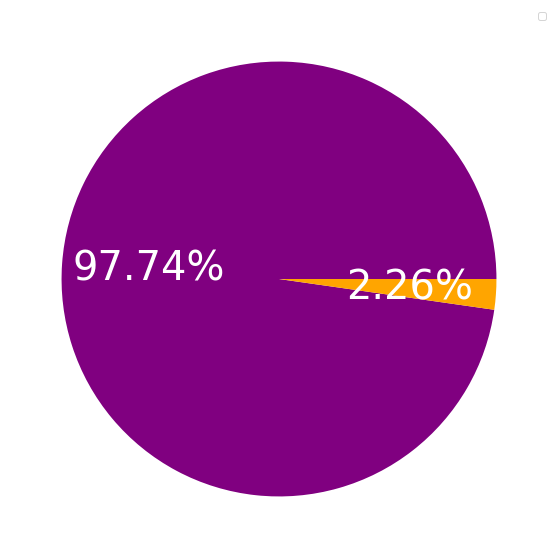

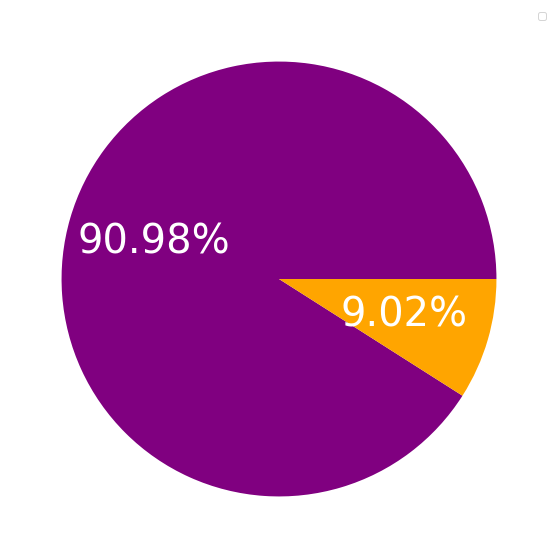

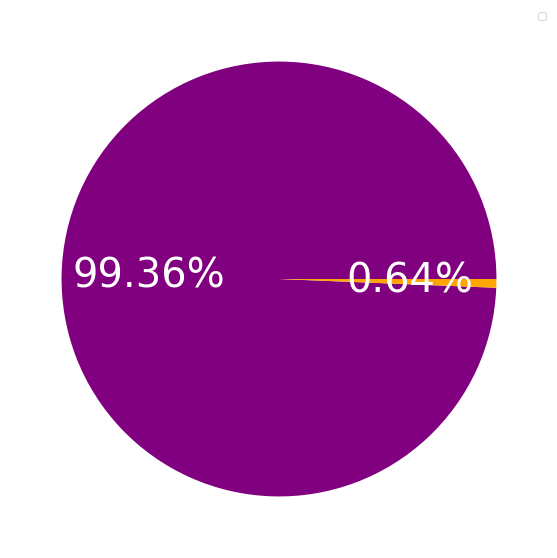

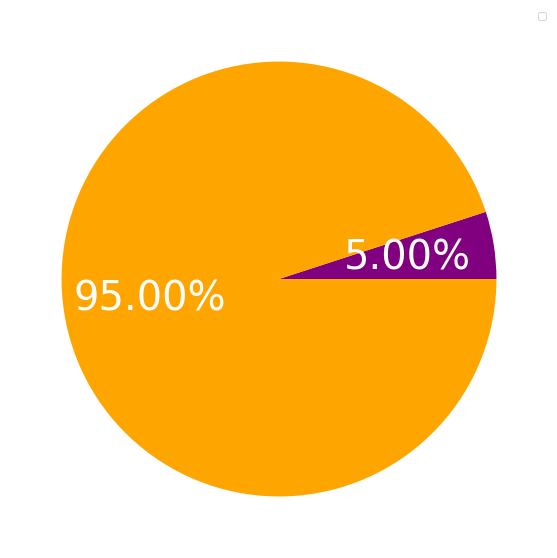

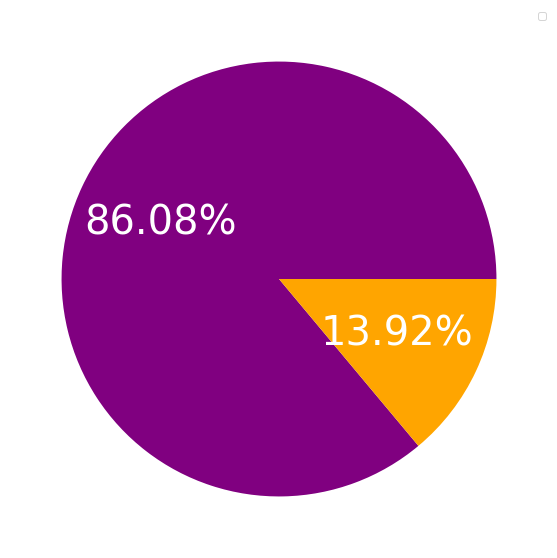

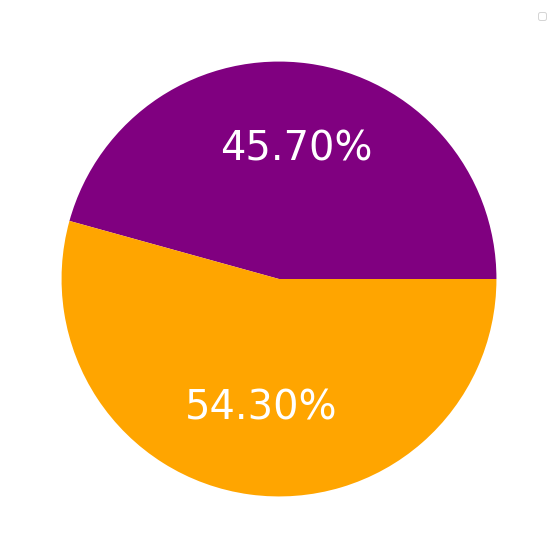

In [75]:
# si calcola il ratio relativo  clickbait/no clickbait per ogni cluster

def ratio_calc():

  clickbait_count = []

  for i in range(0,9):
    path = "c_"+str(i)+".csv"
    cv = pd.read_csv(path)
    ratio = cv.groupby('Typology').size()
    clickbait_count.append(ratio/len(cv))

  return clickbait_count


values = ratio_calc()

def print_pie(ratio_list):   
  for i in range (0,9):
    # Creating dataset 
    empty = ['','']

    data = list(values[i])
    # Creating plot 
    fig = plt.figure(figsize =(10,10)) 
    colors = ["purple", "orange"]
    plt.pie(data, colors=colors, labels = empty,autopct='%.2f%%',textprops={'fontsize': 40,'color':"w"})
    plt.legend()
    # show plot
    savepath = "c"+str(i)+"pie.png" 
    plt.savefig(savepath)

print_pie(values)    

# Classificazione

## Rappresentazione Vettoriale

In [76]:
# Rappresentare in forma Vettoriale un documento/corpus
#Bag Of Words per la parte di classification
vectorizer = CountVectorizer()
X_count = vectorizer.fit_transform(clean_text)

x_count = X_count.toarray()
labels = titles['Typology'].values.tolist()

In [77]:
#Calcoliamo la Sparsity della matrice ottenuta

x2_count = scipy.sparse.csr_matrix(x_count)
density = x2_count.getnnz() / np.prod(x2_count.shape)
print(density)

0.0003346879369689147


In [79]:
#SVD al fine di ridurre la dimensionalità della matrice
#si decide di conservare le prime k features che insieme riescono a spiegare il 90% della variabilità della variabile target

from sklearn.decomposition import TruncatedSVD 
from scipy.sparse import random as sparse_random 

matrix_count = x2_count
# n_components: Desired dimensionality of output data. # n_iter: Number of iterations for randomized SVD solver 
svd_count = TruncatedSVD(n_components=2000, n_iter= 5)
matrix_svd_count = svd_count.fit_transform(matrix_count)

len(matrix_svd_count)

32000

In [80]:
svd_count.explained_variance_ratio_.sum()

0.7619153120488693

## CLASSIFICATORI

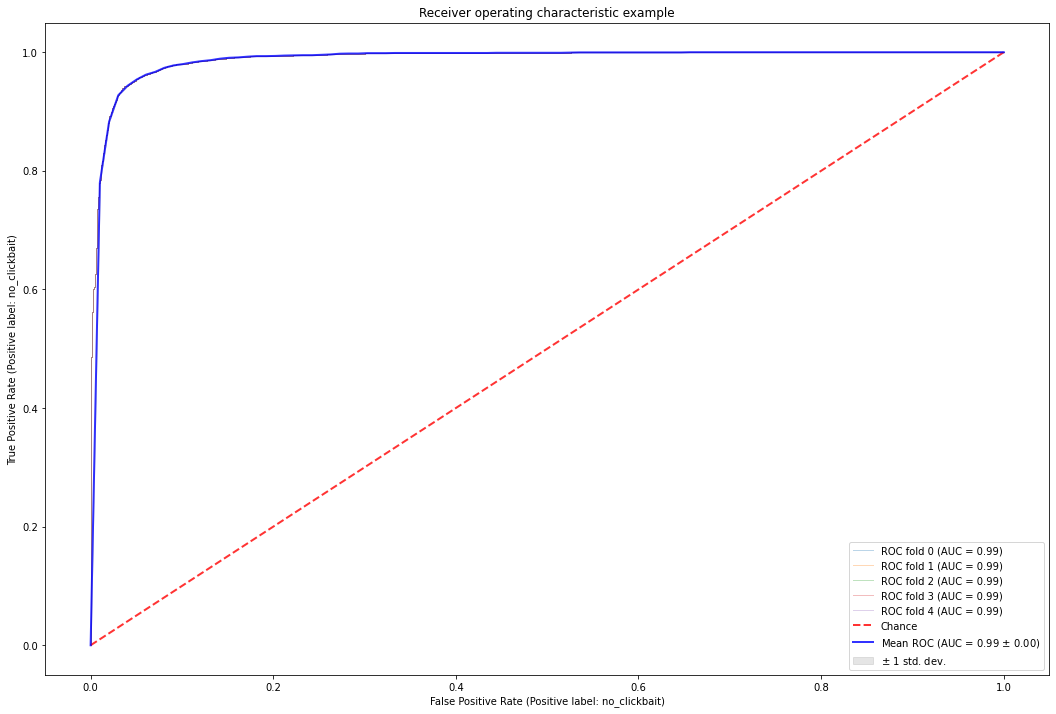

In [81]:
### ROC CURVE PER SUPORT VECTOR MACHINE CROSS VALIDATA
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(matrix_svd_count, labels, test_size = 0.20, random_state = 42, shuffle = True, stratify = labels)   # dove "x" è una lista di vettori e "y" è una lista di labels
# Classification and ROC analysis

# Run classifier with cross-validation and plot ROC curves
cv = StratifiedKFold(n_splits=5)
classifier_svc = svm.SVC(kernel='linear', probability=True,
                     random_state=42)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots()
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 3 , box.height * 3])
for i, (train, test) in enumerate(cv.split(X_train, y_train)):
    clf_svc = SVC(C=2).fit(X_train, y_train) 
    y_pred = clf_svc.predict(X_test)
    viz = plot_roc_curve(clf_svc, X_test, y_test,
                         name='ROC fold {}'.format(i),
                         alpha=0.3, lw=1, ax=ax)
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
        lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                label=r'$\pm$ 1 std. dev.')

ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="Receiver operating characteristic example")
ax.legend(loc="lower right")
plt.show()

[[3011  189]
 [ 123 3077]]


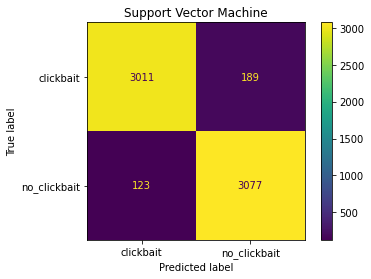

In [82]:
## Valutazione della classificzione SUPPORT VECTOR MACHINE
#Accuracy
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Classification Report
report_svc = classification_report(y_test, y_pred, output_dict = True)
accuracy_score(y_pred, y_test)

# Alternativa più completa
disp = plot_confusion_matrix(clf_svc, X_test, y_test, normalize=None) # attenzione all'argomento "normalize".
disp.ax_.set_title ("Support Vector Machine" ) 
print(disp.confusion_matrix )
plt.show ()

In [83]:
print(report_svc)

{'clickbait': {'precision': 0.9607530312699426, 'recall': 0.9409375, 'f1-score': 0.9507420271550363, 'support': 3200}, 'no_clickbait': {'precision': 0.9421310471524801, 'recall': 0.9615625, 'f1-score': 0.9517476028456542, 'support': 3200}, 'accuracy': 0.95125, 'macro avg': {'precision': 0.9514420392112113, 'recall': 0.9512499999999999, 'f1-score': 0.9512448150003452, 'support': 6400}, 'weighted avg': {'precision': 0.9514420392112113, 'recall': 0.95125, 'f1-score': 0.9512448150003453, 'support': 6400}}


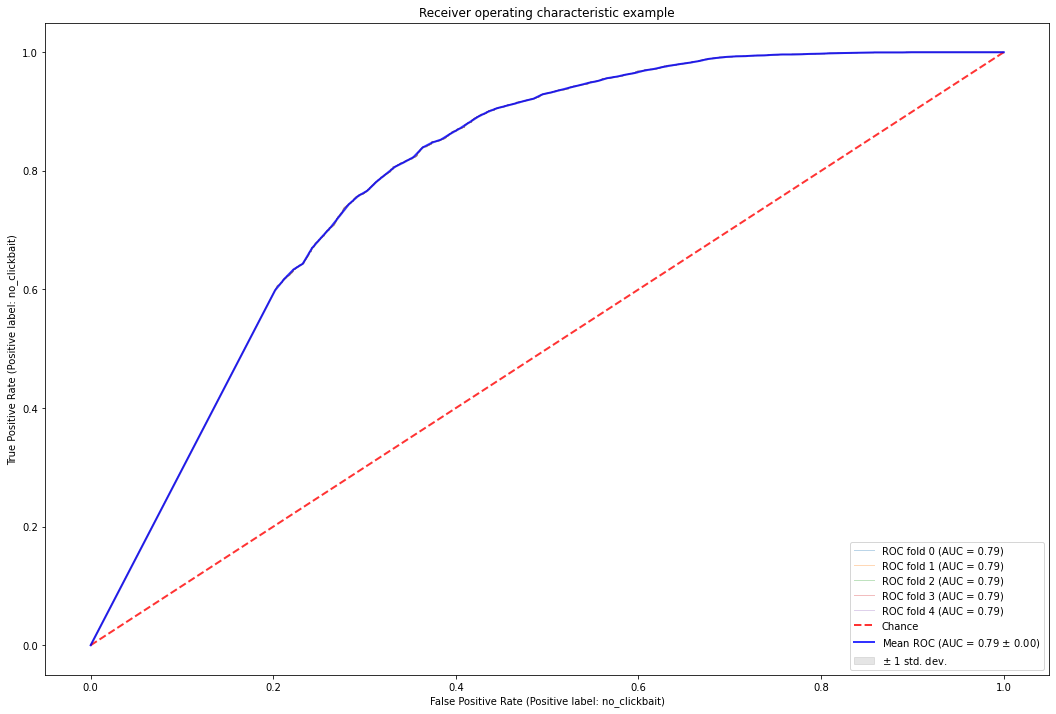

In [84]:
# CLASSIFICAZIONE PER NAIVE BAYES CROSS-VALIDATO
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots()
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 3 , box.height * 3])
for i, (train, test) in enumerate(cv.split(X_train, y_train)):
    clf_nb = GaussianNB().fit(X_train, y_train)  
    y_pred_nb = clf_nb.predict(X_test)
    viz = plot_roc_curve(clf_nb, X_test, y_test,
                         name='ROC fold {}'.format(i),
                         alpha=0.3, lw=1, ax=ax)
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
        lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                label=r'$\pm$ 1 std. dev.')

ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="Receiver operating characteristic example")
ax.legend(loc="lower right")
plt.show()

[[2418  782]
 [1052 2148]]


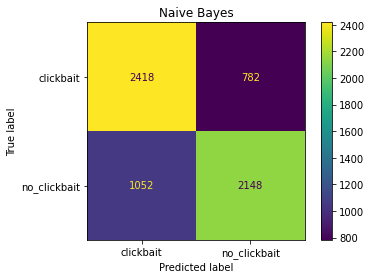

In [85]:
## Valutazione della classificzione NAIVE BAYES CLASSIFIER
#Accuracy
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Classificaion Report
report_nb = classification_report(y_test, y_pred_nb, output_dict = True)
accuracy_score(y_pred_nb, y_test)


# Alternativa più completa
disp_nb = plot_confusion_matrix(clf_nb, X_test, y_test, normalize=None) # attenzione all'argomento "normalize".
disp_nb.ax_.set_title ("Naive Bayes" ) 
print(disp_nb.confusion_matrix )
plt.show ()

In [86]:
print(report_nb)

{'clickbait': {'precision': 0.6968299711815562, 'recall': 0.755625, 'f1-score': 0.7250374812593704, 'support': 3200}, 'no_clickbait': {'precision': 0.7331058020477815, 'recall': 0.67125, 'f1-score': 0.7008156606851549, 'support': 3200}, 'accuracy': 0.7134375, 'macro avg': {'precision': 0.7149678866146689, 'recall': 0.7134375, 'f1-score': 0.7129265709722626, 'support': 6400}, 'weighted avg': {'precision': 0.7149678866146689, 'recall': 0.7134375, 'f1-score': 0.7129265709722625, 'support': 6400}}


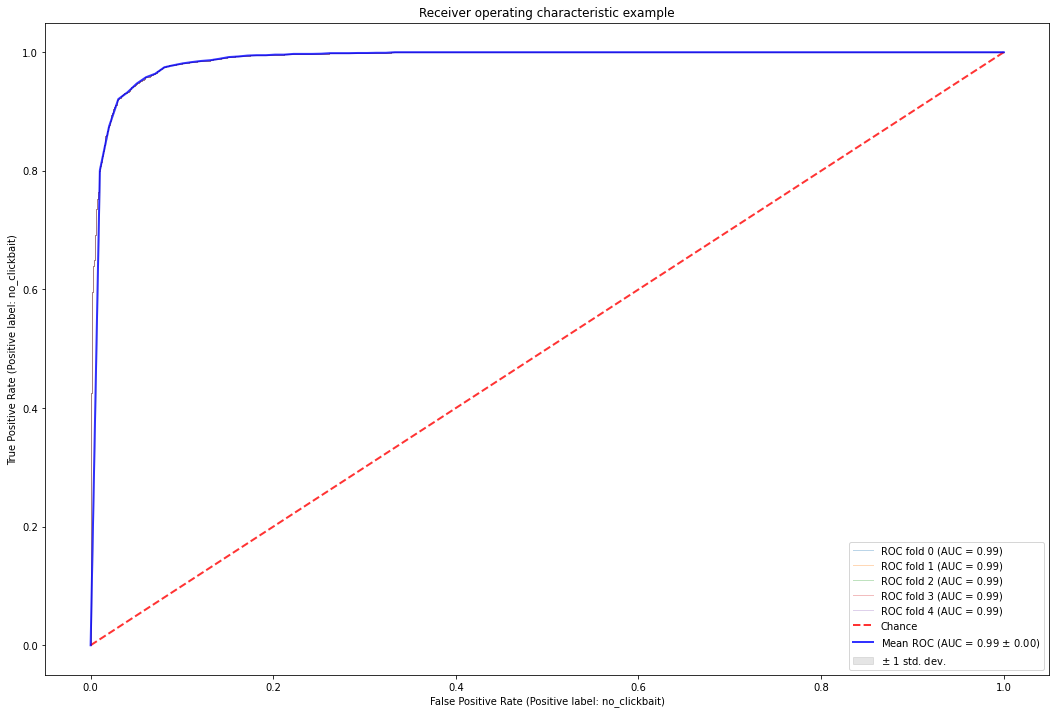

In [87]:
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

# CLASSIFICAZIONE PER LOGISTIC REGRESSION CROSS-VALIDATA


# Run classifier with cross-validation and plot ROC curves
classifier_log = LogisticRegression(penalty='l2', random_state=0)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots()
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 3 , box.height * 3])
for i, (train, test) in enumerate(cv.split(X_train, y_train)):
    clf_log = classifier_log.fit(X_train, y_train)  
    y_pred_log = clf_log.predict(X_test)
    viz = plot_roc_curve(clf_log, X_test, y_test,
                         name='ROC fold {}'.format(i),
                         alpha=0.3, lw=1, ax=ax)
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
        lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                label=r'$\pm$ 1 std. dev.')

ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="Receiver operating characteristic example")
ax.legend(loc="lower right")
plt.show()

[[3008  192]
 [ 135 3065]]


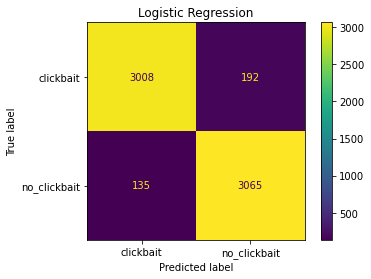

In [88]:
## Valutazione della classificzione LOGISTIC REGRESSION
#Accuracy
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Classification Report
report_log = classification_report(y_test, y_pred_log, output_dict = True)
accuracy_score(y_pred_log, y_test)


# Alternativa più completa
disp_log = plot_confusion_matrix(clf_log, X_test, y_test, normalize=None) # attenzione all'argomento "normalize".
disp_log.ax_.set_title ("Logistic Regression" ) 
print(disp_log.confusion_matrix )
plt.show()

In [89]:
print(report_log)

{'clickbait': {'precision': 0.9570474069360484, 'recall': 0.94, 'f1-score': 0.9484471070471385, 'support': 3200}, 'no_clickbait': {'precision': 0.9410500460546515, 'recall': 0.9578125, 'f1-score': 0.9493572866656341, 'support': 3200}, 'accuracy': 0.94890625, 'macro avg': {'precision': 0.94904872649535, 'recall': 0.94890625, 'f1-score': 0.9489021968563863, 'support': 6400}, 'weighted avg': {'precision': 0.94904872649535, 'recall': 0.94890625, 'f1-score': 0.9489021968563862, 'support': 6400}}
